(2342600, 5)
(69415, 5)
(2273185, 5)
(23000, 5)
Epoch 1/100
7667/7667 [==============================] - 19s 2ms/step - loss: 0.1014
Epoch 2/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0629
Epoch 3/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0486
Epoch 4/100
7667/7667 [==============================] - 19s 3ms/step - loss: 0.0418
Epoch 5/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0382
Epoch 6/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0342
Epoch 7/100
7667/7667 [==============================] - 18s 2ms/step - loss: 0.0313
Epoch 8/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0284
Epoch 9/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0257
Epoch 10/100
7667/7667 [==============================] - 18s 2ms/step - loss: 0.0226
Epoch 11/100
7667/7667 [==============================] - 17s 2ms/step - loss: 0.0213
Epoch 12/100
76

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


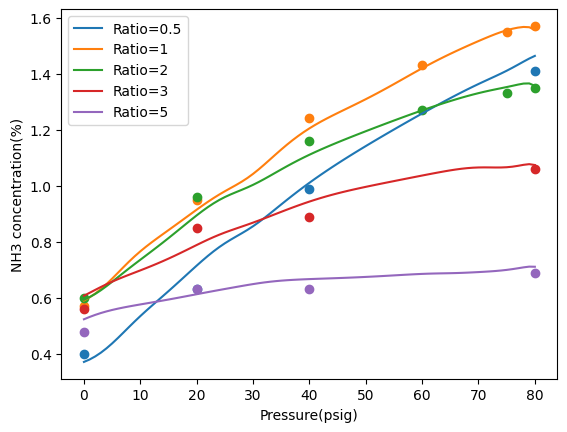

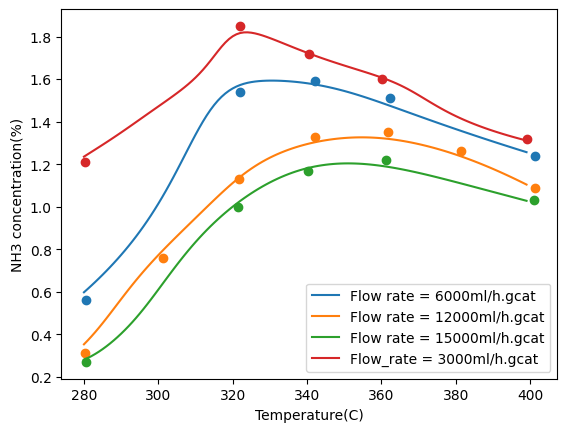

In [ ]:
## Trendline Data; unique 20k + 3k duplicate data points (Taken for RCG presentation)
## Input features: Temperature, Pressure, H2 to N2 ratio, Flow rate
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data = np.array([[320, 0, 0.5, 100, 0.36],
[320, 20.49, 0.5, 100, 0.69],
[320, 39.18, 0.5, 100, 0.96],
[320, 59.59, 0.5, 100, 1.21],
[320, 79.93, 0.5, 100, 1.43],
[320, 0, 1, 100, 0.58],
[320, 10.24, 1, 100, 0.79],
[320, 20.11, 1, 100, 0.96],
[320, 39.33, 1, 100, 1.23],
[320, 59.44, 1, 100, 1.44],
[320, 75.44, 1, 100, 1.55],
[320, 79.85, 1, 100, 1.57],
[320, 0, 2, 100, 0.60],
[320, 10.09, 2, 100, 0.78],
[320, 20.41, 2, 100, 0.94],
[320, 39.18, 2, 100, 1.15],
[320, 59.51, 2, 100, 1.29],
[320, 75.59, 2, 100, 1.34],
[320, 80, 2, 100, 1.34],
[320, 0, 3, 100, 0.61],
[320, 10.32, 3, 100, 0.71],
[320, 20.56, 3, 100, 0.79],
[320, 39.18, 3, 100, 0.91],
[320, 59.44, 3, 100, 1],
[320, 79.85, 3, 100, 1.03],
[320, 0, 5, 100, 0.51],
[320, 10.32, 5, 100, 0.56],
[320, 20.49, 5, 100, 0.59],
[320, 39.33, 5, 100, 0.65],
[320, 59.66, 5, 100, 0.67],
[320, 79.85, 5, 100, 0.68],
[280.50, 80, 1, 100, 0.56],
[321.99, 80, 1, 100, 1.54],
[342.11, 80, 1, 100, 1.59],
[362.24, 80, 1, 100, 1.51],
[401.24, 80, 1, 100, 1.24],
[280.25, 80, 1, 200, 0.31],
[301.37, 80, 1, 200, 0.76],
[321.74, 80, 1, 200, 1.13],
[342.11, 80, 1, 200, 1.33],
[361.74, 80, 1, 200, 1.35],
[381.37, 80, 1, 200, 1.26],
[401.24, 80, 1, 200, 1.09],
[280.50, 80, 1, 250, 0.27],
[321.49, 80, 1, 250, 1.00],
[340.12, 80, 1, 250, 1.17],
[361.24, 80, 1, 250, 1.22],
[400.99, 80, 1, 250, 1.03],
[280.25, 80, 1, 50, 1.21],
[321.99, 80, 1, 50, 1.85],
[360.25, 80, 1, 50, 1.60],
[399.25, 80, 1, 50, 1.32],
[340.62, 80, 1, 50, 1.72]])

my_column_names = ['Temperature(C)','Pressure(psig)','H2 to N2 ratio','Flow rate(ml/g)','Ammonia Concentration(%)']
data = pd.DataFrame(data=data, columns=my_column_names)
dataVariableNames = data.columns.tolist()
feaColums = dataVariableNames[1:5]
labels = dataVariableNames[5:]

dataDel = data.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(dataDel.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,3))
#print(ind_set)\

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(dataDel.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(dataDel.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(dataDel, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 5)
print(smote_data.shape)


# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data]

# Storing unique data points
unique_tuples, unique_indices = np.unique(smote_data_tuples, axis=0, return_index=True)

# Convert the unique tuples back to a NumPy array
unique_data_array = np.array(unique_tuples)
print(unique_data_array.shape)

# Taking random 20000 unique data points
np.random.seed(42)
random_unique_indices = np.random.choice(unique_data_array.shape[0], size=20000, replace=False)
unique_data_random = unique_data_array[random_unique_indices, :]

# Get the indices of duplicate rows
duplicate_indices = np.setdiff1d(np.arange(len(smote_data)), unique_indices)

# Extract duplicate rows from X
duplicate_rows = smote_data[duplicate_indices]
print(duplicate_rows.shape)

# Taking random 3000 duplicate data points
np.random.seed(42)
random_indices = np.random.choice(duplicate_rows.shape[0], size=3000, replace=False)
duplicate_data_random = duplicate_rows[random_indices, :]

# Concatenate unique and duplicata data
smote_data_array = np.vstack((unique_data_random, duplicate_data_random ))
print(smote_data_array.shape)
smote_data_feature = smote_data_array[:, :4]
smote_data_label = smote_data_array[:, 4]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
Temperature = 320
Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure from Combined_array
pressure = [row[1] for row in Combined_array]

# Create 2D figure
plt.figure(1)
figure = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure from Combined_array
pressure = [row[1] for row in Combined_array]

# Create 2D figure
figure = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure from Combined_array
pressure = [row[1] for row in Combined_array]

# Create 2D figure
figure = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure Combined_array
pressure = [row[1] for row in Combined_array]

# Create 2D figure
figure = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure from Combined_array
pressure = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()

### Temperature Plotting
# Temperature range with an increment of 1
Temperature_range = range(280, 400, 1)
Pressure = 80
Ratio_Exp = 1

###############################################################################
Gas_flow_rate = 100

# Creating array for input features
Combined_array = []

for Temperature in Temperature_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract temperature from Combined_array
temperature = [row[0] for row in Combined_array]


# Create 2D figure
plt.figure(2)
figure = plt.plot(temperature, z_pred, label='Flow rate = 6000ml/h.gcat')
plt.scatter([280.5,321.99,342.11,362.24,401.24],[0.56,1.54,1.59,1.51,1.24])
plt.xlabel('Temperature(C)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Gas_flow_rate = 200
Combined_array = []

for Temperature in Temperature_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
temperature = [row[0] for row in Combined_array]


# Create 2D figure
figure = plt.plot(temperature, z_pred, label='Flow rate = 12000ml/h.gcat')
plt.scatter([280.25,301.37,321.74,342.11,361.74,381.37,401.24],[0.31,0.76,1.13,1.33,1.35,1.26,1.09])
plt.legend()
###############################################################################
Gas_flow_rate = 250
Combined_array = []

for Temperature in Temperature_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract temperature from Combined_array
temperature = [row[0] for row in Combined_array]


# Create 2D figure
figure = plt.plot(temperature, z_pred, label='Flow rate = 15000ml/h.gcat')
plt.scatter([280.5,321.49,340.12,361.24,400.99],[0.27,1,1.17,1.22,1.03])
plt.legend()
###############################################################################
Gas_flow_rate = 50
Combined_array = []

for Temperature in Temperature_range:
    Combined_array.append([Temperature, Pressure, Ratio_Exp, Gas_flow_rate])

z_pred = model.predict(Combined_array)

# Extract temperature from Combined_array
temperature = [row[0] for row in Combined_array]


# Create 2D figure
figure = plt.plot(temperature, z_pred, label='Flow_rate = 3000ml/h.gcat')
plt.scatter([280.25,321.99,340.62,360.25,399.25],[1.21,1.85,1.72,1.60,1.32])
plt.legend()

# Define the ranges for each variable
T_range = np.array([280, 400])
P_range = np.array([0, 80])
F_range = np.array([50, 250])
R_range = np.array([0.5, 5])

# Define the number of points for each variable
num_T_points = 120
num_P_points = 80
num_F_points = 20
num_R_points = 10

# Create the meshgrid for each variable
T_values = np.linspace(T_range[0], T_range[1], num_T_points)
P_values = np.linspace(P_range[0], P_range[1], num_P_points)
F_values = np.linspace(F_range[0], F_range[1], num_F_points)
R_values = np.linspace(R_range[0], R_range[1], num_R_points)

# Create the meshgrid
T_mesh, P_mesh, F_mesh, R_mesh = np.meshgrid(T_values, P_values, F_values, R_values, indexing='ij')

# Reshape the meshgrid to get the points for each variable combination
T_points = T_mesh.reshape(-1)
P_points = P_mesh.reshape(-1)
F_points = F_mesh.reshape(-1)
R_points = R_mesh.reshape(-1)

# Combine the points for each variable to get the final data points
data_points = np.column_stack((T_points, P_points, R_points, F_points))

print("Shape of data points array:", data_points.shape)

# Ammonia Concentration
ammonia_conc = model.predict(data_points)
print(ammonia_conc)

# Find the index of the maximum value
max_index = np.argmax(ammonia_conc)
print("Index of maximum value:", max_index)
max_conc = ammonia_conc[max_index]
print("The maximum ammonia concentration is:", max_conc)
print("The input feature for maximum ammonia concentration is:", data_points[max_index])

# Save the model for a Keras HDF5 model
model.save('my_model_ud.h5')